In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
parameters = {"number_nodes": 1882, "radius": [15, 2], "diameter": [28, 4], "average_clustering": [0.005066798238955518, 0.001], "average_path_length": [11.748410823170731, 2], "number_cc": [168, 32], "degree_cdf": [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 24, 46], [0.0, 0.6902231668437833, 0.8517534537725824, 0.9086078639744952, 0.9378320935175345, 0.9516471838469713, 0.9654622741764081, 0.9723698193411264, 0.9776833156216791, 0.9808714133900106, 0.9845908607863975, 0.9888416578108395, 0.9893730074388948, 0.9925611052072264, 0.9936238044633369, 0.9952178533475027, 0.9957492029755579, 0.9968119022316685, 0.997874601487779, 0.9989373007438895, 0.9994686503719448, 1.0]]}
X = np.array(parameters['degree_cdf']).T[:,0]
Y = np.array(parameters['degree_cdf']).T[:,1]
P = Y[1:] - Y[:-1] 
D = X[1:]

D_N = np.array([D,(np.array(P) * 1882).tolist()]).T 
seq = np.concatenate([np.repeat(D_N[i,0],int(round(D_N[i,1]))) for i in range(D_N.shape[0])])
seq = [int(seq[i]) for i in range(len(seq))]

# G = nx.random_degree_sequence_graph(seq, seed = 2)
# cc = list(nx.connected_components(G))
# max_cc = max(cc,key=len)

# cc_3 = [i for i in cc if len(i) == 3]
# for v in cc_3[0]:
#     for u in cc_3[0]:
#         if v > u :
#             G.add_edge(v,u)




            
# sort_cc = sorted(cc, key =len)
# sort_cc_l = [list(i) for i in sort_cc]
 
# G.add_edge(3,0)
# G.add_edge(529,1)
# G.add_edge(672,2)

# G.add_edge(822,5)




# newcc = sort_cc_l[6:]
# cc2 = [newcc[i] for i in range(len(newcc)) if len(newcc[i])==2]
# for i in np.arange(0,len(cc2),2):
#     G.add_edge(cc2[i][1], cc2[i+1][0])
    
# # nx.write_edgelist(G,'Nikita_G.txt',delimiter=' ',data=False)

In [3]:
seq = sorted(seq)
seq = np.array(seq)

In [4]:
sum(seq[-29 : ])

451

In [5]:
seq[np.where(seq == 1)[-1] + 1]

array([1, 1, 1, ..., 1, 1, 2])

In [6]:
G = nx.Graph()


In [7]:
G = nx.random_geometric_graph(1882, radius = 15, dim=2)
        

In [8]:
nx.radius(G)

1

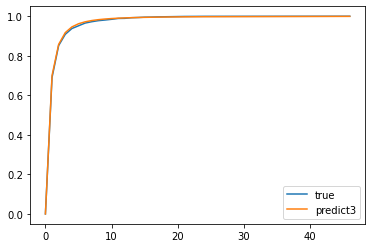

In [9]:
X = np.array(parameters['degree_cdf']).T[:,0]
Y = np.array(parameters['degree_cdf']).T[:,1]

# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

plt.plot(X, Y, label = 'true')
CDF_X_2 = - (1.46846847 / (X + 1.21181181) ** 2) + 1
plt.plot(X, CDF_X_2, label = 'predict3')
plt.legend()
plt.show()

In [10]:
def power_law_generate(n, random_seed):
    #######
    def power_law_ppf(r):
        F_inv = np.sqrt(1.46846847 / (1 - r)) - 1.21181181
        return np.intc(np.round(F_inv))
    #######
    np.random.seed(random_seed)
    uni_sample = np.random.uniform(0, 0.999, n)
    vec_inv = power_law_ppf(uni_sample)
    while  sum(vec_inv) % 2 != 0:
        uni_sample = np.random.uniform(0, 0.999, n)
        vec_inv = power_law_ppf(uni_sample)
    
    return vec_inv

        

In [11]:
parameters

{'number_nodes': 1882,
 'radius': [15, 2],
 'diameter': [28, 4],
 'average_clustering': [0.005066798238955518, 0.001],
 'average_path_length': [11.748410823170731, 2],
 'number_cc': [168, 32],
 'degree_cdf': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   19,
   21,
   24,
   46],
  [0.0,
   0.6902231668437833,
   0.8517534537725824,
   0.9086078639744952,
   0.9378320935175345,
   0.9516471838469713,
   0.9654622741764081,
   0.9723698193411264,
   0.9776833156216791,
   0.9808714133900106,
   0.9845908607863975,
   0.9888416578108395,
   0.9893730074388948,
   0.9925611052072264,
   0.9936238044633369,
   0.9952178533475027,
   0.9957492029755579,
   0.9968119022316685,
   0.997874601487779,
   0.9989373007438895,
   0.9994686503719448,
   1.0]]}

In [12]:
par = []
for i in range(10):
    print(i)
    v = power_law_generate(1882, random_seed=i) 
    try:
        G = nx.configuration_model(v, create_using = nx.Graph, seed = i)
        cc = len(list(nx.connected_components(G)))
        cl = nx.average_clustering(G)
        Gcc = max(nx.connected_components(G), key=len)
        G0 = G.subgraph(Gcc)
        path = nx.average_shortest_path_length(G0)
        r = nx.radius(G0)
        d = nx.diameter(G0)
        par.append([cc,cl,path,r,d]) 
    except:
        pass


0
1
2
3
4
5
6
7
8
9


In [13]:
par

[[1059, 0.002912922121601874, 5.5860987017345165, 7, 13],
 [1079, 0.0013221491280672928, 5.7923692939723255, 8, 14],
 [1098, 0.0008765106695153362, 6.028047318776382, 8, 14],
 [1019, 0.0009481329604380249, 5.7470058723535775, 7, 14],
 [1061, 0.0014251859488872676, 5.505984367366878, 8, 14],
 [1002, 0.0013786454631126738, 6.126712131052898, 8, 15],
 [1022, 0.0012295914803450182, 5.965543897143247, 8, 15],
 [1029, 0.0023290725049749422, 6.324127827479783, 9, 18],
 [1068, 0.0018912248276520256, 6.008798307161154, 9, 17],
 [1066, 0.0015226524350356778, 5.882921216128603, 8, 14]]

In [14]:
# G = nx.configuration_model(seq, create_using=nx.Graph)
# cc_set = nx.connected_components(G)
# cc = len(list(cc_set))
# cl = nx.average_clustering(G)
# maxcc = max(cc_set, key=len)
# G0 = G.subgraph(maxcc)
# path = nx.average_shortest_path_length(G0)
# r = nx.radius(G0)
# d = nx.diameter(G0)





par = []


In [15]:
P = Y[1:] - Y[:-1] 
D = X[1:]

In [16]:
# x_train = power_law_generate(parameters['number_nodes'])
# x_space = np.linspace(0, 40, 100)

# hist, bin_edges = np.histogram(x_train, bins=200, density=True)

# bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
# plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
# plt.plot(x_space, 2 * 1.46846847 / (x_space + 1.21181181) ** 3, 
#          label='Theoretical PDF', c='tab:orange')
# plt.legend()
# # plt.xlim(1, 10)
# plt.show()

In [17]:
D_N = np.array([D,(np.array(P) * 1882).tolist()]).T 
# D_N = D_N[np.argsort(D_N[:,1])]

In [18]:
G = nx.Graph()
# G.add_nodes_from(np.arange(parameters['number_nodes']))

In [19]:
# G = nx.complete_graph(1882)

In [20]:
# D_N
D_N = np.array([D,(np.array(P) * 1882).tolist()]).T 
seq = np.concatenate([np.repeat(D_N[i,0],int(round(D_N[i,1]))) for i in range(D_N.shape[0])])
seq = [int(seq[i]) for i in range(len(seq))]

In [21]:
seq = [int(seq[i]) for i in range(len(seq))]

In [22]:
G = nx.barabasi_albert_graph(1882, 1, seed=None)
def GK(x,xbar,sigma): return np.exp(- (x - xbar) ** 2 / (2 * sigma ** 2))
cluster_ = nx.average_clustering(G)
cc = list(nx.connected_components(G))
cc_len_ = len(cc)
max_cc = max(cc, key=len)
G0 = G.subgraph(max_cc).copy()
d_ = nx.diameter(G0)
r_ = nx.radius(G0)
path_ = nx.average_shortest_path_length(G0)
cc_len = GK(cc_len_,168, 32)
d = GK(d_,28, 4)
r = GK(r_,15, 2)
path = GK(path_, 11.748410823170731, 2)
cluster_1 = GK(cluster_, 0.005066798238955518, 0.001)

In [23]:
nx.write_edgelist(G,'Edge.txt')

In [24]:
G = nx.newman_watts_strogatz_graph(1882, 2, 0.001)
def GK(x,xbar,sigma): return np.exp(- (x - xbar) ** 2 / (2 * sigma ** 2))
cluster_ = nx.average_clustering(G)
cc = list(nx.connected_components(G))
cc_len_ = len(cc)
max_cc = max(cc, key=len)
G0 = G.subgraph(max_cc).copy()
d_ = nx.diameter(G0)
r_ = nx.radius(G0)
path_ = nx.average_shortest_path_length(G0)
cc_len = GK(cc_len_,168, 32)
d = GK(d_,28, 4)
r = GK(r_,15, 2)
path = GK(path_, 11.748410823170731, 2)
cluster = GK(cluster_, 0.005066798238955518, 0.001)

In [68]:
GK(d_,28, 4)

0.04393693362340742

In [25]:
cluster_

0.0

In [28]:
G = nx.complete_graph(1882)
# G_ = nx.ego_graph(G,radius=15, undirected=True)

In [29]:
D = nx.gn_graph(1882, kernel= lambda x: GK(x,28, 4))
G = D.to_undirected()

In [30]:
178 - 168

10

In [31]:
parameters

{'number_nodes': 1882,
 'radius': [15, 2],
 'diameter': [28, 4],
 'average_clustering': [0.005066798238955518, 0.001],
 'average_path_length': [11.748410823170731, 2],
 'number_cc': [168, 32],
 'degree_cdf': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   19,
   21,
   24,
   46],
  [0.0,
   0.6902231668437833,
   0.8517534537725824,
   0.9086078639744952,
   0.9378320935175345,
   0.9516471838469713,
   0.9654622741764081,
   0.9723698193411264,
   0.9776833156216791,
   0.9808714133900106,
   0.9845908607863975,
   0.9888416578108395,
   0.9893730074388948,
   0.9925611052072264,
   0.9936238044633369,
   0.9952178533475027,
   0.9957492029755579,
   0.9968119022316685,
   0.997874601487779,
   0.9989373007438895,
   0.9994686503719448,
   1.0]]}

In [32]:
len(list(nx.connected_components(G)))

1

In [33]:
nx.average_clustering(G)

0.0

In [34]:
Gcc = max(nx.connected_components(G), key=len)
G0 = G.subgraph(Gcc)
nx.diameter(G0)

10

In [35]:
np.log(1882) / np.log(1.2118)


39.24945947864896

In [36]:
np.mean(seq)

1.849096705632306

In [37]:
G = nx.erdos_renyi_graph(1882, 0.005066798238955518)
nx.diameter(G)

6

In [38]:
for i in range(10):
    G = nx.random_degree_sequence_graph(seq, seed = i)
    cluster_ = nx.average_clustering(G)
    cc = list(nx.connected_components(G))
    cc_len_ = len(cc)
    max_cc = max(cc, key=len)
    G0 = G.subgraph(max_cc).copy()
    d_ = nx.diameter(G0)
    r_ = nx.radius(G0)
    path_ = nx.average_shortest_path_length(G0)
    print(i)
    print(11.748410823170731 - 3 * 2 < path_ < 11.748410823170731 + 3 * 2)
    print(15 - 2 * 3 < r_ < 15 + 2 * 3)
    print(28 - 4 * 3 < d_ < 28 + 4 * 3)
    print(0.005066798238955518 - 0.001 * 3 < cluster_ < 0.005066798238955518 + 0.001 * 3)
    print(168 - 32 * 3 < cc_len_ < 168 + 32 * 3)

0
True
True
True
False
False
1
True
False
False
False
False
2
True
False
True
False
False
3
True
False
True
True
False
4
True
False
True
False
False
5
True
True
True
False
False
6
True
False
False
False
False
7
True
False
False
False
False
8
True
True
True
False
False
9
True
False
True
False
False


In [39]:
G = nx.random_degree_sequence_graph(seq, seed = 0)
cc = list(nx.connected_components(G))
max_cc = max(cc,key=len)
cc_3 = [i for i in cc if len(i) == 3]
for v in cc_3[0]:
    for u in cc_3[0]:
        if v > u :
            G.add_edge(v,u)

for v in cc_3[1]:
    for u in cc_3[1]:
        if v > u :
            G.add_edge(v,u)

for v in cc_3[2]:
    for u in cc_3[2]:
        if v > u :
            G.add_edge(v,u)
            
            

            
sort_cc = sorted(cc, key =len)
sort_cc_l = [list(i) for i in sort_cc]
# 
# G.add_edge(3,0)
# G.add_edge(529,1)
# G.add_edge(672,2)

# G.add_edge(822,5)
# G.add_edge(51,6)
# G.add_edge(670,7)
# G.add_edge(1066,9)


# newcc = sort_cc_l[7:]
# cc2 = [newcc[i] for i in range(len(newcc)) if len(newcc[i])==2]
# for i in np.arange(0,len(cc2),2):
#     G.add_edge(cc2[i][1], cc2[i+1][0])

In [40]:
G = nx.configuration_model(seq, create_using=nx.Graph, seed=0)
G0 = G.subgraph(max(nx.connected_components(G),key=len))
g = [np.sum(list(nx.shortest_path_length(G0, source=i).values())) for i in G0.nodes]

In [41]:
# G = nx.configuration_model(seq, create_using=nx.Graph, seed=0)
G0 = G.subgraph(max(nx.connected_components(G), key=len)).copy()
cc = sorted(nx.connected_components(G), key=len)


In [42]:
sum(g)/(G0.number_of_nodes() * (G0.number_of_nodes() - 1))

6.66875867426656

In [63]:
# nx.draw(G.subgraph({127, 430, 1145, 1300, 1329, 1498, 1687}))
# G.add_edge(1687, 712)
l = []
for i in G0.nodes:
    try:
        len_ = np.array(list(nx.single_source_shortest_path_length(G0,i).values()))
        j = np.array(list(nx.single_source_shortest_path_length(G0,i).keys()))
        l.append([len_[len_==17][0] , i])
    except:
        continue

In [64]:
l

[[17, 131],
 [17, 200],
 [17, 212],
 [17, 226],
 [17, 277],
 [17, 328],
 [17, 783],
 [17, 949],
 [17, 969],
 [17, 1293]]

In [70]:
d = [list(i) for  i in cc if (len(i) != 3) & (len(i) <= 4)][::-1]

In [75]:
len(d)

259

In [113]:
v = power_law_generate(1882, random_seed=i) 

In [114]:
v

array([1, 2, 0, ..., 0, 2, 2], dtype=int32)

In [116]:
v = np.array(l)[:,1].tolist()
for i in range(10):
    G.add_edge(v[i],d[i][0])

In [78]:
l = np.array(l)
a = l[l[:,0] == l[:,0].max()]
(a[1,[2]],b[-1,[0]])
print(a.shape)

def Add_Gi(Gi_set, G):
    G0 = G.subgraph(Gi_set)
    l = []
    for i in Gi_set:
        len_ = list(nx.single_source_shortest_path_length(G0,i).values())[-1]
        j = list(nx.single_source_shortest_path_length(G0,i).keys())[-1]
        l.append([len_,j,i])
    l = np.array(l)
    l = l[l[:,0] == l[:,0].max()]
    return [l[0,1],l[0,2], l[0,0]]
    
b = np.array([Add_Gi(i,G) for i in cc[:-1]])

IndexError: index 2 is out of bounds for axis 1 with size 2

In [79]:
a[:,[1,2]]

for i in range(1,10):
    G.add_edge(a[i,[2]][0],b[-i,[0]][0])

IndexError: index 2 is out of bounds for axis 1 with size 2

In [80]:
G0 = G.subgraph(max(nx.connected_components(G), key=len)).copy()
print(nx.average_clustering(G))
print(nx.diameter(G0))
print(nx.radius(G0))
print(nx.average_shortest_path_length(G0))
print(nx.number_connected_components(G))

0.0022766704651065407
24
13
7.024243598357288
300


In [81]:
Gnew = G.copy()

In [82]:
171-168

3

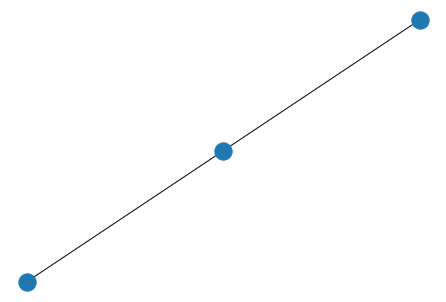

In [83]:
nx.draw(G.subgraph({11, 1076, 1465}))

In [84]:
cc = sorted(nx.connected_components(G), key=len)
[i for i in cc if len(i)==3][:3]

[{1, 204, 1496}, {9, 673, 1494}, {11, 1076, 1465}]

In [85]:
aa = Add_Gi(set(G0.nodes), G)

NameError: name 'Add_Gi' is not defined

In [86]:
# G.add_edge(783,465)
# G.add_edge(1701,712)
# G.add_edge(1764,127)
# G.add_edge(1687,452)
# nx.draw(G.subgraph({170, 224, 843, 964, 1472, 1732}))
# {170, 224, 843, 964, 1472, 1732},
# {452, 602, 638, 1446, 1599, 1689},
# {127, 430, 1145, 1300, 1329, 1498, 1687},
# {712, 1136, 1326, 1463, 1518, 1590, 1764}
# {465, 529, 563, 1071, 1127, 1627, 1631, 1701}



# G.add_edge(783,712)
# G.add_edge(783,127)
# G.add_edge(783,452)
# G.add_edge(783,170)
# G.add_edge(783,511)
# G.add_edge(783,248)
# G.add_edge(783,62)
# G.add_edge(783,48)

#  {582, 1123, 1397, 1492},
#  {954
  
# G.add_edge(783,27)
# G.add_edge(783,151)
# G.add_edge(783,209)
# G.add_edge(783,412)
# G.add_edge(783,481)

In [87]:
G.add_edge(1293,1136)
G.add_edge(712,511)

In [88]:
G0 = G.subgraph(max(nx.connected_components(G), key=len)).copy()
print(nx.average_clustering(G))
print(nx.diameter(G0))
print(nx.radius(G0))
print(nx.average_shortest_path_length(G0))

0.0022766704651065407
31
16
7.211976222131522


In [89]:
print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.average_clustering(G))
print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.number_connected_components(G))


7.211976222131522
0.0022766704651065407
31
16
298


In [90]:
print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.average_clustering(G))
print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
nx.number_connected_components(G)

7.211976222131522
0.0022766704651065407
31
16


298

In [91]:

# {0, 529},
#  {1, 672},
#  {2, 822},
#  {5, 51},
#  {6, 670},
#  {7, 1066},
#  {9, 534}

In [92]:
for i in range(7,136):
    G.add_edge(sort_cc_l[i][1],sort_cc_l[i+1][0])

In [93]:
cc = list(nx.connected_components(G))
max_cc = max(cc,key=len)
cc_3 = [i for i in cc if len(i) == 3]

In [94]:
# for v in cc_3[0]:
#     for u in cc_3[0]:
#         if v > u :
#             G.add_edge(v,u)

for v in cc_3[1]:
    for u in cc_3[1]:
        if v > u :
            G.add_edge(v,u)
            
            
# for v in cc_3[2]:
#     for u in cc_3[2]:
#         if v > u :
#             G.add_edge(v,u)


In [95]:
200 - 168 +4

36

In [96]:
nx.write_edgelist(G,'g5.txt',delimiter=' ',data=False)

In [97]:
print(nx.average_shortest_path_length(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.average_clustering(G))
print(nx.diameter(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.radius(G.subgraph(max(list(nx.connected_components(G)),key=len))))
print(nx.number_connected_components(G))

7.490223425579028
0.003870719349272321
27
14
212


In [98]:
G.subgraph(max(nx.connected_components(G), key=len)).degree

DegreeView({0: 1, 3: 1, 5: 1, 6: 1, 7: 1, 12: 1, 13: 2, 14: 2, 15: 2, 16: 1, 17: 1, 18: 2, 19: 2, 20: 1, 21: 2, 22: 1, 23: 2, 24: 2, 25: 2, 26: 1, 27: 2, 31: 1, 32: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 1, 45: 2, 46: 2, 47: 2, 48: 1, 50: 1, 52: 1, 53: 2, 57: 2, 58: 2, 62: 2, 63: 1, 64: 2, 67: 1, 69: 1, 71: 1, 74: 1, 77: 1, 78: 1, 79: 2, 80: 1, 81: 2, 82: 2, 83: 1, 85: 1, 86: 1, 87: 2, 89: 2, 90: 2, 92: 1, 93: 2, 94: 1, 95: 2, 96: 2, 97: 1, 99: 1, 100: 2, 104: 1, 105: 1, 106: 2, 108: 1, 109: 1, 110: 1, 112: 1, 113: 1, 115: 1, 117: 1, 118: 2, 119: 1, 120: 2, 122: 2, 123: 1, 124: 2, 126: 1, 127: 2, 128: 1, 130: 2, 131: 3, 132: 1, 133: 1, 134: 2, 135: 2, 138: 2, 139: 1, 141: 1, 142: 1, 145: 1, 146: 2, 147: 1, 148: 2, 150: 1, 151: 2, 153: 2, 154: 1, 155: 1, 156: 1, 159: 1, 161: 2, 162: 2, 163: 1, 164: 1, 166: 2, 167: 1, 168: 1, 169: 1, 170: 1, 171: 1, 173: 1, 174: 2, 176: 1, 177: 2, 178: 2, 179: 1, 180: 1, 181: 1, 183: 2, 184: 1, 185: 2, 186: 1, 187: 1

In [99]:
G.add_edge(8,11)
G.add_edge(460,13)
G.add_edge(1102,124)

G.add_edge(14,120)
# G.add_edge(15,18)
# G.add_edge(286,1082)
# G.add_edge(19,21)


# [11, 460],
#  [13, 1102],
#  [124, 14],
#  [120, 15],
#  [18, 286],
#  [1082, 19],
#  [1067, 21]

In [100]:
nx.number_connected_components(G)

211

In [101]:
[i for i in list(nx.connected_components(G)) if (len(i)==3) | (len(i)==2)]

[{1, 204, 1496},
 {2, 858},
 {4, 971},
 {9, 673, 1494},
 {10, 88},
 {28, 520},
 {29, 1271},
 {33, 721},
 {49, 1005},
 {51, 1012},
 {54, 475, 1349},
 {55, 569},
 {56, 763, 1593},
 {59, 630},
 {60, 624},
 {61, 975},
 {68, 643},
 {70, 182},
 {72, 242},
 {73, 738},
 {75, 266},
 {76, 188, 1334},
 {84, 501},
 {91, 944},
 {98, 1148},
 {101, 157},
 {102, 193, 1540},
 {103, 863},
 {107, 259},
 {111, 378},
 {114, 865},
 {116, 129},
 {121, 140},
 {125, 331},
 {136, 1041},
 {137, 1172},
 {143, 1084},
 {144, 1243},
 {152, 496},
 {165, 1044},
 {172, 817},
 {175, 251},
 {192, 1202},
 {198, 1046},
 {205, 655, 1376},
 {207, 715},
 {210, 1279},
 {215, 906},
 {218, 257},
 {219, 645},
 {220, 801},
 {231, 749, 1340},
 {235, 523},
 {239, 732},
 {246, 557},
 {249, 1222},
 {261, 1232},
 {264, 487},
 {267, 615},
 {278, 461},
 {281, 774},
 {283, 790, 1313},
 {287, 506},
 {288, 1054},
 {292, 1178},
 {295, 908},
 {299, 960},
 {313, 970, 1402},
 {316, 886},
 {319, 997},
 {320, 1198},
 {321, 1023},
 {323, 1037},
 {

In [102]:
3 и 2 
3 и 3 и 3
3 и 3 и 3
1146


SyntaxError: invalid syntax (<ipython-input-102-1fff9687f4c6>, line 1)

In [103]:
G.add_edge(1388,1393)

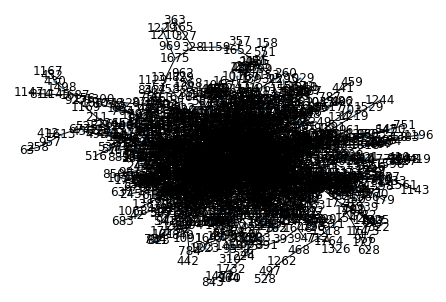

In [104]:
nx.draw(G.subgraph(max((nx.connected_components(G)), key = len)),node_size=1,with_labels = True)

In [105]:
max((nx.number_connected_components(G)))

TypeError: 'int' object is not iterable

In [106]:
nx.number_connected_components(G)

210

In [107]:
a = nx.shortest_simple_paths(G.subgraph(max_cc),3,16)

In [117]:
list(G.edges)

[(0, 1804),
 (1, 1496),
 (2, 858),
 (3, 1801),
 (4, 971),
 (5, 1854),
 (6, 1881),
 (7, 1786),
 (8, 745),
 (8, 11),
 (9, 1494),
 (9, 673),
 (10, 88),
 (11, 1465),
 (12, 1845),
 (13, 1826),
 (13, 460),
 (14, 1839),
 (14, 120),
 (15, 1839),
 (15, 18),
 (16, 146),
 (17, 1829),
 (18, 1499),
 (19, 1801),
 (19, 1067),
 (20, 1322),
 (21, 1872),
 (21, 311),
 (22, 1842),
 (23, 1881),
 (23, 24),
 (24, 128),
 (25, 260),
 (25, 106),
 (26, 1449),
 (27, 1707),
 (27, 685),
 (28, 520),
 (29, 1271),
 (30, 649),
 (30, 66),
 (31, 1717),
 (32, 1743),
 (33, 721),
 (34, 914),
 (35, 1564),
 (36, 1864),
 (37, 1876),
 (38, 1866),
 (39, 1851),
 (39, 40),
 (40, 1801),
 (41, 1241),
 (41, 434),
 (42, 683),
 (42, 421),
 (43, 1162),
 (43, 914),
 (44, 1634),
 (45, 1786),
 (45, 949),
 (46, 376),
 (46, 1002),
 (47, 978),
 (47, 714),
 (48, 1658),
 (49, 1005),
 (50, 1391),
 (51, 1012),
 (52, 648),
 (53, 1717),
 (53, 57),
 (54, 1349),
 (55, 569),
 (56, 1593),
 (57, 516),
 (58, 1859),
 (58, 660),
 (59, 630),
 (60, 624),
 (6